# Marketing
1. Chứng minh xe hybrid > gas
2. Đề xuất hướng để tăng doanh số xe hybrid (và xe electric)

# Data science
1. Xây dựng những bản biểu để thể mối quan hệ của các xe đã bán -> xe hybrid sẽ những đđ lợi nào
2. Xây dựng 1 tham số (metric) từ đó team marketing có thể dựa vào để monitor doanh số xe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("pastel")


In [2]:
df = pd.read_csv('./data/data.csv')
# profile = ProfileReport(df, title="Profiling Report")

In [3]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


# EDA

In [4]:
def missing_data(df):
    """
    Get report of missing value
    """
    missing_values = df.isnull().sum()
    missing_percentages = (df.isnull().sum() / df.shape[0]) * 100

    missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage (%)': missing_percentages})
    return missing_data_df

missing_data(df)

,Missing Values,Missing Percentage (%)
model,0,0.0
year,0,0.0
price,0,0.0
transmission,0,0.0
mileage,0,0.0
fuelType,0,0.0
tax,0,0.0
mpg,0,0.0
engineSize,0,0.0


In [47]:
from typing import Dict, Literal

def determine_data_types(df):
    """
    Determine type of data of the columns: 
    - Discrete
        - Boolean
        - Categorical (text or code representation)
        - Large Discrete (finite (less than 31 distinct), number representation)
        - Label (text representation and large number of distinct value)
    - Continuous (infinite, number representation)
    """
    data_types: Dict[str, Literal["Boolean", "Categorical", "Large Discrete", "Continuous", "Label"]] = {}

    for col in df.columns:
        unique_count = df[col].nunique()
        unique_values = df[col].unique()

        if pd.api.types.is_bool_dtype(df[col]) or len(unique_values) <= 2:
            data_types[col] = "Boolean"
        elif len(unique_values) <= 10 and unique_values.dtype == object:
            data_types[col] = "Categorical"
        elif 10 <= unique_count <= 31 and pd.api.types.is_integer_dtype(df[col]):
            data_types[col] = "Large Discrete"
        elif pd.api.types.is_numeric_dtype(df[col]):
            data_types[col] = "Continuous"
        else:
            data_types[col] = "Label"

    return data_types

data_types = determine_data_types(df)

In [50]:
def draw_bar(series: pd.Series):
    """
    Draw bar graph
    """
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(8, 6))

    # Load the example car crash dataset
    df = pd.DataFrame(series)
    col_label = df.columns[0]

    ax = sns.countplot(data=df, y=col_label, order = df[col_label].value_counts().index, width=0.5)

    abs_values = df[col_label].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values)

In [49]:
def draw_histogram(series):
    """
    Wrapper for histogram function
    """
    sns.histplot(x=series, bins=20)

In [78]:
def draw_line(df, column_name):
    f, ax = plt.subplots(figsize=(5, 5))
    sns.lineplot(x=column_name, y="count", data=pd.DataFrame(df[column_name].value_counts().reset_index()), ax=ax)

## Visualize each column

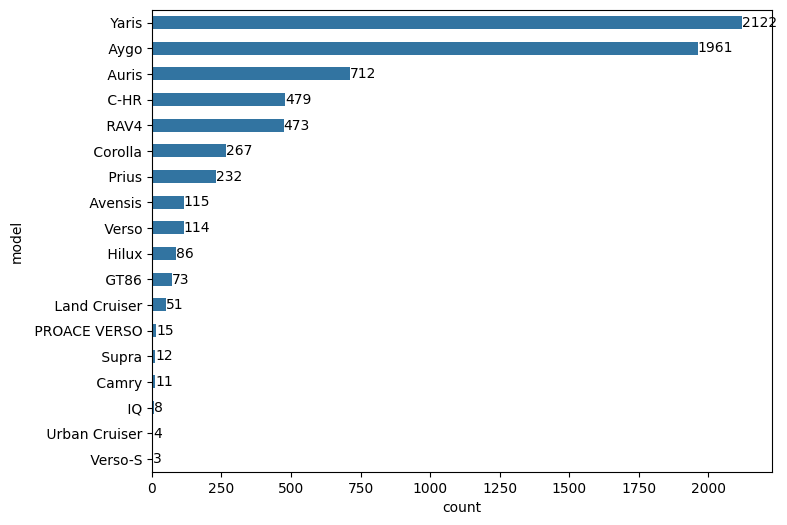

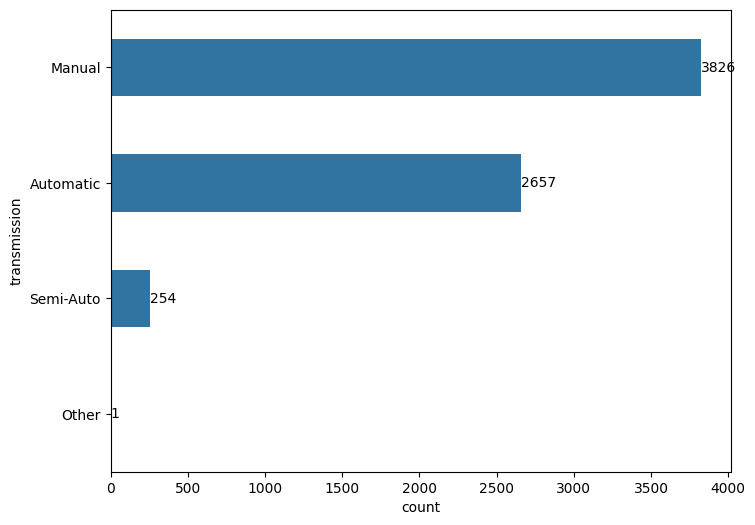

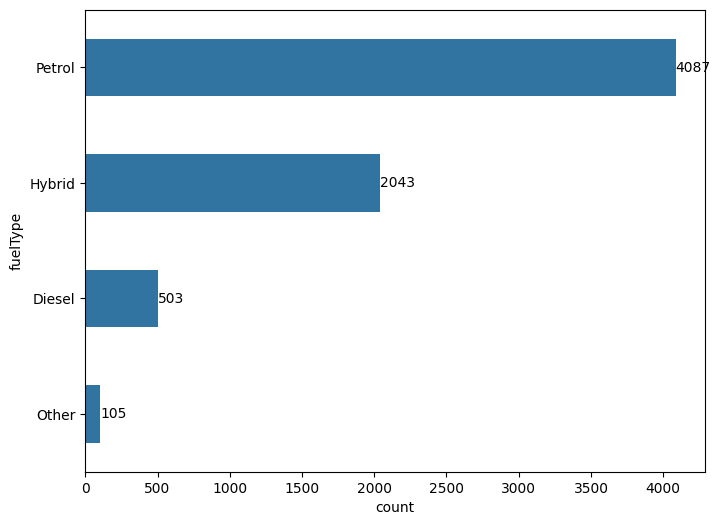

In [79]:
for index, value in data_types.items():
    if value =='Label' or value =='Categorical':
        draw_bar(df[index])

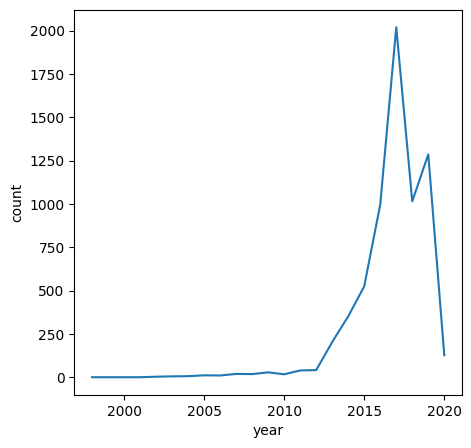

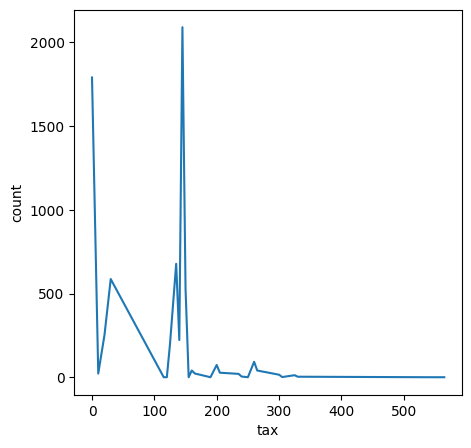

In [80]:
for index, value in data_types.items():
    if value =='Large Discrete':
        draw_line(df, index)